# En este proyecto se analiza el impacto del COVID-19 en los países sudamericanos, midiendo el total de muertes confirmadas por cada millón de personas. Se utiliza Python junto con las bibliotecas pandas, numpy y matplotlib para limpiar, procesar, visualizar y extraer conclusiones a partir de los datos.

*Herramientas usadas:*

*   Python (Google Colab)
*   Pandas
*   Matplotlib
*   Dataset: Our World in Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar los datos con Pandas:**

In [ ]:
df = pd.read_csv('cumulative-confirmed-covid-19-deaths-per-million-people.csv')

**Visualizar las primeras 5 filas:**

In [ ]:
df.head()

,Entity,Day,Total confirmed deaths due to COVID-19 per million people
0,Afghanistan,2025-07-13,197.097990
1,Albania,2025-07-13,1276.010900
2,Algeria,2025-07-13,151.306120
3,Andorra,2025-07-13,1995.607200
4,Angola,2025-07-13,54.356697


**Visualizar las columnas:**

In [ ]:
df.columns

Index(['Entity', 'Day',
       'Total confirmed deaths due to COVID-19 per million people'],
      dtype='object')

**Visualizar información general de los datos:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     198 non-null    object 
 1   Day                                                        198 non-null    object 
 2   Total confirmed deaths due to COVID-19 per million people  198 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


**Vamos a analizar los datos de los países de Sudamérica**

In [ ]:
paises_sudamerica = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

**Filtraremos los países en el DataFrame**

In [ ]:
df_sud = df[df['Entity'].isin(paises_sudamerica)]

In [ ]:
df_sud['Total confirmed deaths due to COVID-19 per million people'] = df_sud['Total confirmed deaths due to COVID-19 per million people'].round(2).astype(int)

**Veamos los primeros datos del resultado**

In [ ]:
df_sud.head()

,Entity,Day,Total confirmed deaths due to COVID-19 per million people
6,Argentina,2025-07-13,2880.14
20,Bolivia,2025-07-13,1853.84
23,Brazil,2025-07-13,3342.59
34,Chile,2025-07-13,3215.52
36,Colombia,2025-07-13,2759.64


**Ordenar de mayor a menor según la columna seleccionada**

In [ ]:
df_sud = df_sud.sort_values(by='Total confirmed deaths due to COVID-19 per million people', ascending=False)
df_sud.head()

,Entity,Day,Total confirmed deaths due to COVID-19 per million people
140,Peru,2025-07-13,6603.60
23,Brazil,2025-07-13,3342.59
34,Chile,2025-07-13,3215.52
139,Paraguay,2025-07-13,2940.65
6,Argentina,2025-07-13,2880.14


**Graficar los datos**

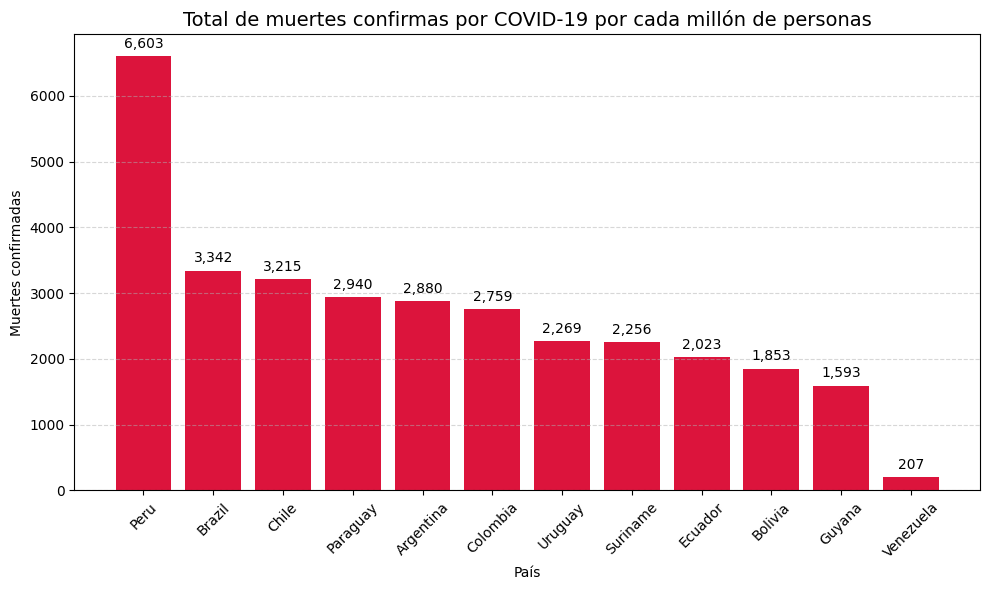

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.bar(df_sud['Entity'], df_sud['Total confirmed deaths due to COVID-19 per million people'], color='crimson')
plt.title('Total de muertes confirmas por COVID-19 por cada millón de personas', fontsize=14)
plt.xlabel('País')
plt.ylabel('Muertes confirmadas')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
for bar in bars:    # Agregar etiquetas encima de las barras con las cantidades de muertes
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 80,   # 100 = espacio arriba de la barra
             f'{int(height):,}',                              # muestra número con separador de miles
             ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

**Obtener el promedio de muertes por millón de personas**

In [ ]:
df_sud['Total confirmed deaths due to COVID-19 per million people'].mean()

np.float64(2662.135)

Información estadística sobre los países

In [ ]:
df_sud.describe()

,Total confirmed deaths due to COVID-19 per million people
count,12.000000
mean,2662.135000
std,1507.166331
min,207.560000
25%,1980.807500
50%,2514.485000
75%,3009.367500
max,6603.600000


In [ ]:
df_sud.head(12)

,Entity,Day,Total confirmed deaths due to COVID-19 per million people
140,Peru,2025-07-13,6603.60
23,Brazil,2025-07-13,3342.59
34,Chile,2025-07-13,3215.52
139,Paraguay,2025-07-13,2940.65
6,Argentina,2025-07-13,2880.14
36,Colombia,2025-07-13,2759.64
190,Uruguay,2025-07-13,2269.33
171,Suriname,2025-07-13,2256.36
50,Ecuador,2025-07-13,2023.13
20,Bolivia,2025-07-13,1853.84


In [ ]:
df_sud['Total confirmed deaths due to COVID-19 per million people'].median()

2514.4849999999997

In [ ]:
df_sud['Total confirmed deaths due to COVID-19 per million people'].max() - df_sud['Total confirmed deaths due to COVID-19 per million people'].min()

6396.04

**País más afectado y el menos afectado**

In [ ]:
df_sud.sort_values('Total confirmed deaths due to COVID-19 per million people', ascending=False).head(1)  # más afectado

,Entity,Day,Total confirmed deaths due to COVID-19 per million people
140,Peru,2025-07-13,6603.6


In [ ]:
df_sud.sort_values('Total confirmed deaths due to COVID-19 per million people').head(1)    # menos afectado

,Entity,Day,Total confirmed deaths due to COVID-19 per million people
193,Venezuela,2025-07-13,207.56


**Gráfico Boxplot para ver distribución general y outliers**

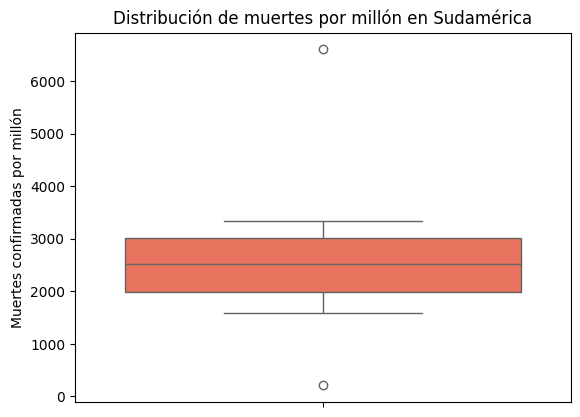

In [ ]:
sns.boxplot(data=df_sud, y='Total confirmed deaths due to COVID-19 per million people', color='tomato')
plt.title('Distribución de muertes por millón en Sudamérica')
plt.ylabel('Muertes confirmadas por millón')
plt.show()

**% Respecto al máximo**

In [ ]:
df_sud['% respecto al máximo'] = (df_sud['Total confirmed deaths due to COVID-19 per million people'] / df_sud['Total confirmed deaths due to COVID-19 per million people'].max()) * 100
df_sud[['Entity', '% respecto al máximo']]

,Entity,% respecto al máximo
140,Peru,100.000000
23,Brazil,50.617693
34,Chile,48.693440
139,Paraguay,44.531013
6,Argentina,43.614695
36,Colombia,41.789933
190,Uruguay,34.365043
171,Suriname,34.168635
50,Ecuador,30.636774
20,Bolivia,28.073172


**Crear la conclusión automática con el país con más muertes y el país con menos muertes, además de los porcentajes respecto al promedio.**

In [ ]:
pais_max = df_sud.loc[df_sud['Total confirmed deaths due to COVID-19 per million people'].idxmax()]
pais_min = df_sud.loc[df_sud['Total confirmed deaths due to COVID-19 per million people'].idxmin()]
promedio = df_sud['Total confirmed deaths due to COVID-19 per million people'].mean()

In [ ]:
porcentaje_max = ((pais_max['Total confirmed deaths due to COVID-19 per million people'] - promedio) / promedio) * 100
porcentaje_min = ((pais_min['Total confirmed deaths due to COVID-19 per million people'] - promedio) / promedio) * 100

In [ ]:
pmu = lambda x: f"{x:,.0f}"  # formato con separador de miles
pct = lambda x: f"{x:.1f}%"  # formato para porcentajes

In [ ]:
conclusion = f"""
🔎 Análisis de muertes confirmadas por COVID-19 en Sudamérica:

- El país con más muertes por millón fue **{pais_max['Entity']}**, con **{pmu(pais_max['Total confirmed deaths due to COVID-19 per million people'])}** muertes por cada millón de personas.
- El país con menos muertes fue **{pais_min['Entity']}**, con **{pmu(pais_min['Total confirmed deaths due to COVID-19 per million people'])}** muertes por millón.
- El promedio regional de muertes por millón fue **{pmu(promedio)}**.

Comparado con el promedio:
- **{pais_max['Entity']}** está **{pct(porcentaje_max)} por encima** del promedio.
- **{pais_min['Entity']}** está **{pct(porcentaje_min)} por debajo** del promedio.
"""

print(conclusion)


🔎 Análisis de muertes confirmadas por COVID-19 en Sudamérica:

- El país con más muertes por millón fue **Peru**, con **6,604** muertes por cada millón de personas.
- El país con menos muertes fue **Venezuela**, con **208** muertes por millón.
- El promedio regional de muertes por millón fue **2,662**.

Comparado con el promedio:
- **Peru** está **148.1% por encima** del promedio.
- **Venezuela** está **-92.2% por debajo** del promedio.



**Guardar en formato CSV**

In [ ]:
df_sud.to_csv('muertes_covid_sudamerica.csv', index=False)

In [204]:
readme = """
# 📊 Impacto del COVID-19 en Sudamérica

Este proyecto analiza el total de muertes confirmadas por COVID-19 por cada millón de personas en países de Sudamérica.
El objetivo es identificar los países más afectados en relación a su población y visualizar los datos de forma clara y concisa.

## 📁 Dataset

- Fuente: [Our World In Data](https://ourworldindata.org/covid-deaths)
- Columna usada: `Total confirmed deaths due to COVID-19 per million people`
- Países seleccionados: Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Paraguay, Peru, Uruguay, Venezuela, Guyana y Suriname.

## 🛠️ Herramientas utilizadas

- Python 3
- Google Colab
- pandas
- matplotlib

## 🧼 Limpieza de datos

- Se filtraron únicamente los países de Sudamérica.
- Se tomó el último valor disponible de muertes acumuladas por millón de personas.
- Se eliminaron valores nulos o no disponibles.

## 📊 Visualización

Se generó un gráfico de barras que muestra claramente las diferencias entre países.
Cada barra incluye el valor de muertes por millón para facilitar la lectura.

## 📈 Conclusiones

- **Perú** presenta la mayor tasa de muertes por millón de habitantes.
- **Venezuela** y **Guyana** tienen las tasas más bajas.
- Este tipo de análisis ayuda a evaluar el impacto sanitario relativo entre países con diferentes poblaciones.

## 💼 Aplicación profesional

Este proyecto demuestra habilidades en:

- Análisis de datos con pandas
- Visualización clara con matplotlib
- Comunicación de resultados
- Limpieza y transformación de datos reales
"""

In [206]:
with open("README.md", "w", encoding="utf-8") as f:
  f.write(readme)